In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/Ocean/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


NodeView((1, 2, 3))

EdgeView([(1, 2)])

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

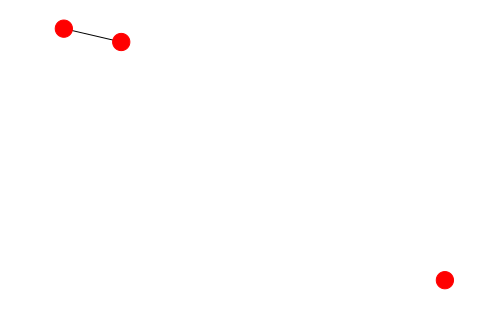

In [3]:
import networkx as nx 
G = nx.Graph() 
G
G.add_nodes_from([1,2,3]) 
G.nodes() 
G.add_edge(1,2) 
G.edges()

G.node[1]['label'] = 'blue'
G.nodes(data=True)

nx.draw(G)
plt.show()


## Tutorial Stanford Networkx
- convert to undi ```g.to_undirected()```
- ```add_nodes_from()``` takes any iterable collection and object (having __iter__() method)
    1. g = nx.Graph()
    2. g.add_node('a')
    3. g.add_nodes_from(['b','c','d'])
    4. g.add_nodes_from('xyz')
    5. h = nx.path_graph(5)
    6. g.add_nodes_from(h)
    7. g.nodes() 
- adding edges ```python g.add_edge('a','d') and g.add_edges_from([('d','c')...])```
- every node and edge having DICT keys and vals, type indiff, but hashable !
- properties: len(g) g.number_of_nodes() g.order() g.has_node(1) etc
- iterating over edges 
    1. ```[e for e in G.edges_iter()] # print out elements```
    2. ```[(n, nbrs) for n, nbrs in G.adjacency_iter()] # print metadata```
    3. G[1][2]['attr'] = 5 # assigning new
- simple graph generators
    1. nx.complete_graph(5)
    2. nx.path_graph(5)
    3. nx.complete_bipartite_graph(n1,n2)
    4. nx.grid_graph() # arbitrary dim lattice of tuples of ints
    5. nx.gnp_random_graph(n, p)
    6. nx.gnm_random_graph(n, m)
- useful func
    * nx.connected_component_subgraphs(G)
    * nx.union(G,H) intersection(G,H) complete(G) find_cores(G)
    * nx.shortest_path(G, s, t) nx.betweenness_centrality(G)
    * nx.average_clustering(G)
    * nx.diameter(G)
- reading Edge List Txt
    - nx.read_edgelist('elist.txt', comment='#', delimiter='\t')
    - 

## Basic operation
- .nodes() returns list of nodes
- .edges() returns LIST of TUPLES, showing nodes detail
- data=True in these methods retrieves metadata

## Retrieving and slicing list of metadata
```python
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010,1,1)]
```


### Undirected graphs - e.g. Facebook social graph in which no inherent rationality in EDGE (sans flèche)
### Directed graphs - e.g. Twitter social graph ->

In [37]:
# direct graph

D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

### Multi(Di)Graph: trip records between bike sharing stations

In [38]:
M = nx.MultiGraph()
type(M)

MD = nx.MultiDiGraph()
type(MD)

networkx.classes.multigraph.MultiGraph

networkx.classes.multidigraph.MultiDiGraph

### Resource intense in Multi(Di)Graph when direction multiplies
### To collapse into METADATA (weight = 3 edges)
### Self-loops - nodes self-connected

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



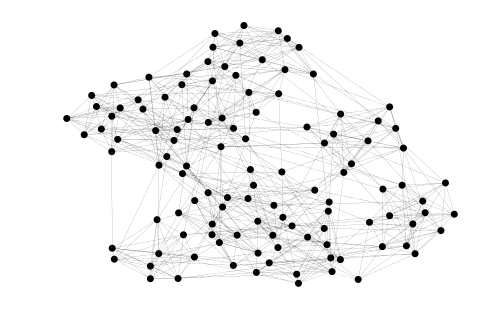

In [4]:
# load a football network data

import io
import zipfile
import urllib.request as urllib

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url) # open url
s = io.BytesIO(sock.read()) # read into BytesIO 'file'
sock.close()

zf = zipfile.ZipFile(s) # zipfile object
txt = zf.read('football.txt').decode() # read info file
gml = zf.read('football.gml').decode() # read gml data

gml = gml.split('\n')[1:] # discard bogus first line
G_Foot = nx.parse_gml(gml)

print(txt)

options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(G_Foot, **options)
plt.show()

### Reference 
```python
G_FB = nx.read_edgelist('Data_Folder/facebook_combined.txt', create_using=nx.DiGraph(), nodetype=int)

print(nx.info(G_FB))

spring_pos = nx.spring_layout(G_FB)

plt.axis('off')
nx.draw_networkx(G_FB, pos=spring_pos, with_labels=False, node_size=10)
```

## Iter graph to assign WEIGHT 'strength' in EDGES
```python
# Set the weight of the edge
T.edge[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:
    
        # Set the weight to 1.1
        d['weight'] = 1.1
```
## assert 'self-loop' before analysis (useful for physical graph)
```python
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u == v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))
```


# Network Visual - irrational vs rational
1. Matrix plots
    * row-col : using matrix to map graph DIRECTION: row -> col
2. Arc plots
    * arc maps ordered axis 
3. Circos plots
    * transform arc into circle - originally for genomics
## nxviz API - pkg for RATIONAL graph visual, mpl uses nx.to_numpy_matrix(G), corollary nx.from_numpy_matrix(A) default Graph(), create_using=nx.DiGraph() if needed

```python
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()
```
### CircosPlot
```python
c = CircosPlot(G)
c.draw()
```
### Ordered ArcPlot using metadata as input
```python
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
```




# Degree Centrality - Which nodes are important?
> #### # Neighbours Having / # Neighours Possible
> Full-link = all possible, e.g. Twitter broadcasters, Tokyo airport hubs, diease super-spreaders

```python
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    
    # Iterate over all nodes in G
    for n in G.nodes():
    
        # Check if the number of neighbors of n matches m
        if len(G.neighbors(n)) == m:
        
            # Add the node n to the set
            nodes.add(n)
            
    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T,6)
print(six_nbrs)
```

## Get distribution of Degree of Centrality iter Graph
```python
degrees = [len(T.neighbors(n)) for n in T.nodes()]
```
#### Plotting
```python
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()
```



## Graph algorithms: Path Finding
- optimisation: e.g. SP
- modelling: e.g. dsiease spread, info passing
- #### Algorithm:
    * Breadth-first search (BFS): shortest path through search neighours network
- Algorithms are important for asssessing importance of nodes

In [107]:
# the algorithm

def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

## Betweenness Centrality
- All shortest path: graph mapping all SP exist for each pair
> ### Definition: # SP of node / All possible SP

- Application: individual bridging, critical information transfer links
- e.g. Singapore: Raffles Place, connection stations weigh more in Betweenness Centrality

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

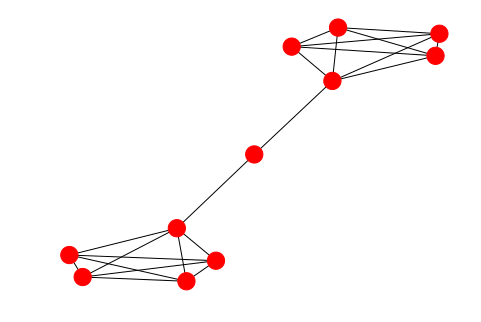

{'Iowa', 'FloridaState', 'Nevada', 'Wisconsin', 'PennState', 'SouthernCalifornia', 'BrighamYoung', 'NevadaLasVegas', 'TexasTech', 'SouthernMethodist', 'Tulsa', 'KansasState'}


In [114]:
G_betweenness = nx.barbell_graph(m1=5, m2=1)

nx.betweenness_centrality(G_betweenness)

nx.draw(G_betweenness)
plt.show()

# plotting scatter of degree of centrality vs betweenness centrality


# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(G_Foot)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(G_Foot)[node] == max(nx.degree_centrality(G_Foot).values())

In [117]:
# similarly for betweenness centrality

# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    
    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))
    
    nodes = set()
    
    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():
    
        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(G_Foot)
top_bc
# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(G_Foot)[node] == max(nx.betweenness_centrality(G_Foot).values())

{'NotreDame'}

# Cliques and communities: tightly-knit network
- essentially defined via social cliques - completely connected
- simplest = triangle
## Application of finding triangle in network
- friend recommendation systems - triangle-closure

In [149]:
G_FB

# useful group iteration tools

from itertools import combinations

for n1, n2 in combinations(G_FB.nodes(), 2):
    break


    
# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1,n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    
len(nodes_in_triangle(G_Foot, 'Duke'))

nx.triangles(G_Foot)

10

{'BrighamYoung': 23,
 'FloridaState': 29,
 'Iowa': 25,
 'KansasState': 22,
 'NewMexico': 23,
 'TexasTech': 24,
 'PennState': 21,
 'SouthernCalifornia': 26,
 'ArizonaState': 26,
 'SanDiegoState': 26,
 'Baylor': 20,
 'NorthTexas': 14,
 'NorthernIllinois': 15,
 'Northwestern': 21,
 'WesternMichigan': 17,
 'Wisconsin': 23,
 'Wyoming': 23,
 'Auburn': 19,
 'Akron': 22,
 'VirginiaTech': 24,
 'Alabama': 20,
 'UCLA': 25,
 'Arizona': 28,
 'Utah': 25,
 'ArkansasState': 10,
 'NorthCarolinaState': 28,
 'BallState': 15,
 'Florida': 20,
 'BoiseState': 12,
 'BostonCollege': 27,
 'WestVirginia': 26,
 'BowlingGreenState': 21,
 'Michigan': 21,
 'Virginia': 29,
 'Buffalo': 21,
 'Syracuse': 24,
 'CentralFlorida': 4,
 'GeorgiaTech': 29,
 'CentralMichigan': 17,
 'Purdue': 23,
 'Colorado': 19,
 'ColoradoState': 24,
 'Connecticut': 3,
 'EasternMichigan': 16,
 'EastCarolina': 20,
 'Duke': 29,
 'FresnoState': 29,
 'OhioState': 21,
 'Houston': 20,
 'Rice': 30,
 'Idaho': 14,
 'Washington': 26,
 'Kansas': 19,
 'Sou

In [150]:
# finding open triangles

from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in G_Foot.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G_Foot, n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)


115


## Maximal Cliques: cliques non-extendable by adding an adjacent edge, useful for finding communities
- applications: community finding
### Communities - find cliques
- naive finding communities - find unions of cliques
- find_cliques find alll maximal cliques !

In [151]:
num_MaxClique = nx.find_cliques(G_betweenness)

list(num_MaxClique)

# edges are also a clique (those 2 nodes pairs)

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

In [155]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

len(list(nx.find_cliques(G_Foot)))

len(maximal_cliques(G_Foot,3))

281

64

## Subgraphs - visualise a subgraph is useful, recall NY taxi networks


NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

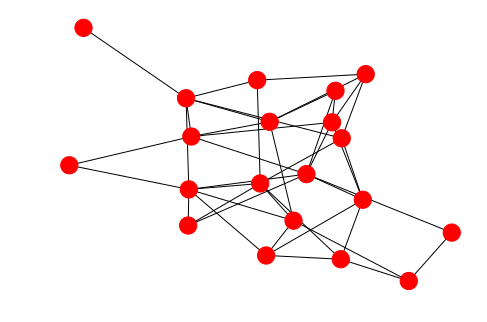

EdgeView([(0, 8), (5, 8), (6, 8), (7, 8), (7, 17), (8, 17)])

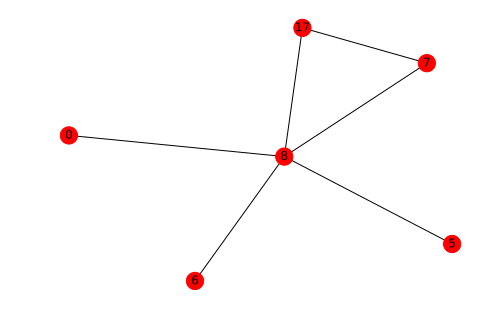

In [168]:
G_subgraph = nx.erdos_renyi_graph(n=20, p=0.2)

G_subgraph.nodes()

sub = G_subgraph.neighbors(8)
sub = list(sub)

nx.draw(G_subgraph)
plt.show()

sub.append(8) # get subgraph among 8

G_eight = G_subgraph.subgraph(sub)

G_eight.edges()

nx.draw(G_eight, with_labels=True)

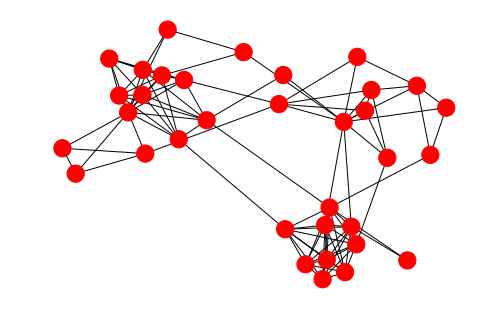

In [169]:
nodes_of_interest = ['Iowa', 'Duke', 'Navy']

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
to_draw = get_nodes_and_nbrs(G_Foot, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(to_draw)
plt.show()

# the subgraph consisting nodes of interest and their neighbours

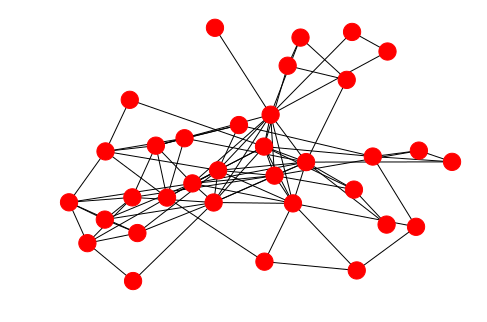

In [175]:
# Extract the nodes of interest: nodes
nodes_seven = [n for n, d in G_Foot.nodes(data=True) if d['value'] == 7]

# Create the set of nodes: nodeset
nodeset = set(nodes_seven)

# Iterate over nodes
for n in nodes_seven:

    # Compute the neighbors of n: nbrs
    nbrs = G_Foot.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
G_Foot_Sub = G_Foot.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(G_Foot_Sub)
plt.show()


# CASE: GitHub user collab network at least 1 repo
### Goals: analyse structure, visual, build simple systeme conseiller

## Connected Component Subgraphs: no edges connecting between subgraphs, isolated subgraphs


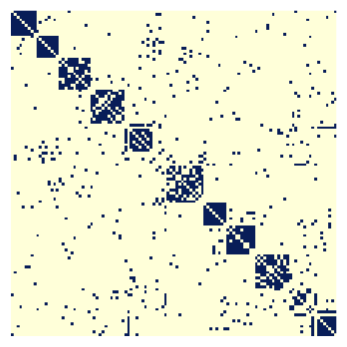

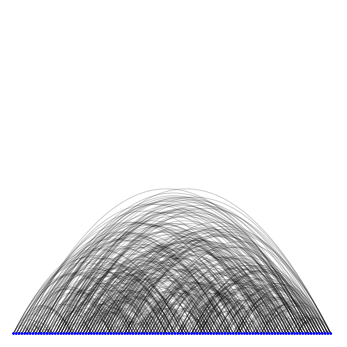

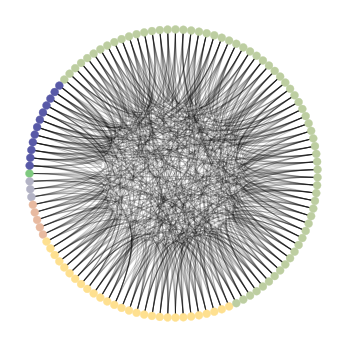

In [284]:
# Import necessary modules
from nxviz import MatrixPlot


# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G_Foot), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs, node_grouping='value')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()



# Import necessary modules
from nxviz.plots import ArcPlot

# Iterate over all the nodes in G, including the metadata
for n, d in G_Foot.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degrees']
    G_Foot.node[n]['degrees'] = nx.degree(G_Foot, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph=G_Foot, node_order='degrees')

# Draw the ArcPlot to the screen
a.draw()
plt.show()



# Import necessary modules
from nxviz import CircosPlot
 
# Iterate over all the nodes, including the metadata
for n, d in G_Foot.nodes(data=True):

    # Calculate the degree of each node: _Foot.node[n]['degree']
    G_Foot.node[n]['degrees'] = nx.degree(G_Foot, n)

# Create the CircosPlot object: c
c = CircosPlot(G_Foot, node_order='degrees', node_grouping='degree', node_color='degree')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

### Cliques

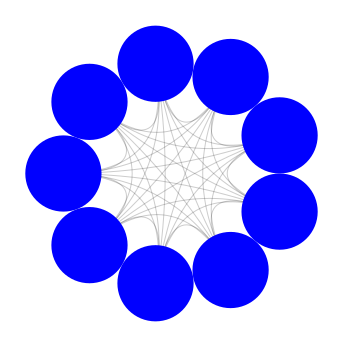

In [285]:

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G_Foot), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G_Foot.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

## Find influencer and make systeme conseiller
- find influencer
- find largest communities
- build collaboration recomm system - OPEN TRIANGLE

In [287]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G_FB)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

[107]


In [292]:

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G_Foot), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G_Foot.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G_Foot.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G_Foot.neighbors(node)), G_Foot.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

NetworkXError: SubGraph Views are readonly. Mutations not allowed

In [293]:
# Import necessary modules
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G_Foot.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G_Foot.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G_Foot.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('ArizonaState', 'OregonState'), ('UCLA', 'WashingtonState'), ('Arizona', 'California'), ('Oregon', 'Stanford'), ('SouthernCalifornia', 'Washington'), ('EastCarolina', 'Cincinnati')]


# Part 2 << Bipartite graph & Recomm System; graph projections & time-dynamic graphs >>

In [5]:
# some EDA

G_Foot.number_of_edges()
G_Foot.number_of_nodes()
G_Foot.number_of_selfloops()

613

115

0

# Bipartite graphs
- partitioned into 2 sets
- nodes are connected only to the other partitions
- contrast 'unipartite' 
- e.g. customer - product buying graph
- attr often stored as key 'bipartite'
```python
G = nx.Grahp()
num = range(3)
G.add_nodes_from(num, bipartite='customers')
letters = ['a', 'b']
G.add_nodes_from(letters, bipartite='products')
```
## vis-a-vis Centrality, ALL-NODE becomes # NODEs in opposite partition
- Newworkx has no bipartite filter, use LIST-COMPR to filter
- e.g. 
```python
customer_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'customers']
```
- methods syntax (either partition)
```python
nx.bipartite.degree_centrality(G, customer_nodes)
```

```python
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))
```


## Def Get Shared Repo Users
```python
def shared_partition_nodes(G,node1,node2):
    # Check that the nodes belong to the same partition
    assert G.node[node1]['bipartite'] == G.node[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G,'u7909','u2148')))
```


## Def Similarity between Nodes in one partition
```python
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.node[user1]['bipartite'] == 'users'
    assert G.node[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G,user1,user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G,'projects')
similarity_score = user_similarity(G, 'u4560','u1880',project_nodes)

print(similarity_score)
```


## Def Find most similar users to user
```python
from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.node[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes) 
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

print(most_similar_users(G, 'u4560', user_nodes, project_nodes))
```

## DEF Recomm System
```python
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

# Print the repositories to be recommended
print(recommend_repositories(G,'u7909','u2148'))
```


## Projection: Unipartie representation of Bipartite connectivity
## Reading network data
- edge list 
```python
nx.read_edgelist('filename.txt')```
- adjacent list
- CSV node+meta and edge+meta
### Bipartite Projection
- first get customer (projected partition) into a single CONTAINER
```python
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'customers']
```
- then use spec func to create
```python
G_cust = nx.bipartite.projected_graph(G, cust_nodes)
```
**the resulting edges are projected edges**
## Recall Degree Centrality, and for bipartite graph
```python
nx. bipartite.degree_centrality(G, cust_nodes)```
## Visual

```python
import matplotlib.pyplot as plt

# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure() 
original_dc = nx.bipartite.degree_centrality(G, people)  
plt.hist(list(original_dc.values()), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()
people_dc = nx.degree_centrality(peopleG)
plt.hist(list(people_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show()

# Plot the degree centrality distribution of the clubsG graph
plt.figure()
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(list(clubs_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()
```


## Bipartite Graph as Matrices
- Row: nodes on one partition
- Col: nodes on other partition
- Cells: 1 if edge, 0 None
```python
mat = nx.bipartite.biajacency_matrix(G, row_order=cust_nodes, column_order=prod_nodes)```
- mat is a sparse matrix type
## Matrix Projection MAGIC
- **matrix X transposed matrix = PROJECTION**

    mat @ mat.T

Python 3.5 new operator @ multiplies matrices, resulting sparse matrix

- example

```python
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

print(user_matrix)
```


## (Difficult!) Imputing metadata back into matrics to find shared 'clubs' among 'users'
```python
# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices = np.where(users_coo.data == users_coo.data.max())[0]
print('People with most number of shared memberships:')
for idx in indices:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]]))  
```


## Repr Graph with Pandas
- CSV files for network data storage
- pros: 
    - legible
    - further analysis with pandas
- cons:
    - repetitive; disk space
### 2 LISTs, Node and Edge 
- row and col {metadata}
```python
nodelist = []
for n, d in G.nodes(data=True):
    node_data = dict()
    node_data['node'] = n
    node_data.update(d)
    nodelist.append(node_data)
# nodelist : [{'bipartite': 0, 'node': 0},...]
pd.DataFrame(nodelist).to_csv('node_file.csv')
```
### club-people example

```python
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())
```
### And converting edges

```python
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G_people.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
print(edge_df.head())
```



# Graph Differences: Evolving graphs, time-dynamics
- TS: $f_t(X)$
- rate of change over windows of times
- motivation: TS of graphs
## e.g. Communication networks
- assuming edge change but node constant
- both change is harder
## Analogy: set differences (edge dynamics)

```python
set(c1, c2, c3).difference(set(c2,c3,c4)) = set(c1)
set(c2, c3, c4).difference(set(c1,c2,c3)) = set(c4)
nx.difference(G1, G2) # ASSUMING fixed NODE SET

G1.edges() # [('cust1', 'cust2'), ('cust3', 'cust2')]
G2.edges() # [('csut1', 'cust3'), ('cust3', 'cust2')]

G2minusG1 = nx.difference(G2, G1)
G1minusG2 = nx.difference(G1, G2)
```


### Example of communication networks
- senders and recipients with cols of time windows

```python
months = range(4, 11)

# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'],df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))
```
### Fractional change (edges)

```python
import networkx as nx  
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2,g1))   
    removed.append(nx.difference(g1,g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)
```

### plotting

```python
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')
plt.show()
```


## Evolving graph statistics - graph summary stats
- num of nodes / edges 
- Degree distribution
- Centrality distribution
### Mechanis
- for simple metrics, use edgelist data
- for graph theoretic metrics, use graph object (nx.method)
- ECDF or Histogram

```python
fig = plt.figure()

# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]

# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')                           
plt.show() 
```

### plotting Deg.Cent dynamics

```python
# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)


# Plot ECDFs over time
fig = plt.figure()
for i in range(len(cents)):
    x, y = ECDF(cents[i].values()) 
    plt.plot(x, y, label='Month {0}'.format(i+1)) 
plt.legend()   
plt.show()
```


## Scaling EDA - global and local 
- Global: Centrality distribution
- Local: Connectivity and structures
### Zooming on NODE
- isolate a given node or set of nodes
- plot node stats over time
- e.g. cust-prod dataset 'how purchaisng patterns changed for certain cust nodes

```python
# evolving Deg.Cent for customer1

Gs = [....]
node_i = 'customer1'
degs = []
for g in Gs:
    degs.append(len(g.neighbors(node_i)))
plt.plot(degs)
```

## DEFAULT DICTIONAIRES - unlike regular DICT returning ERROR if get an item whose key not in DICT

```python
from collections import defaultdict

d = defaultdict(list)

d['heathrow'].append(0.31)
d['heathrow'].append(0.84)

d # defaultdict(list, {'heathrow': [0.31, 0.84]})

d2 = dict()
d2['heathrow'].append(0.31)
# KeyError: 'heathrow'
```

### Get top-connected student or highest deg.cent

```python
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[0:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))
```

### example

```python
# Import necessary modules
import matplotlib.pyplot as plt 
from collections import defaultdict 

# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(g.neighbors(n)))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items():
    plt.plot(conn, label=n)
plt.legend()  
plt.show()
```


# CASE: tying up to analyse college forum posts forming a bipartite graph between student and forum
- build graph from panda df
- compute unipartite projections student
- visualisation
- TS filtering and analysis

```python
G.add_nodes_from(df['products'], bipartite='products')
G.add_nodes_from(df['customers'], bipartite='customers')
G.add_edges_from(zip(df['customers'], df['products']))
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite']=='customers']
prodG = nx.bipartite.projected_graph(G, nodes=prod_nodes)

# add in each edge along with metadata
for r, d in df.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date'])

# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show() 
```

## Time-based filtering

```python
[(u, v) for u, v d in G.edges(data=True) if d['sale_count'] >= 10]
```

True

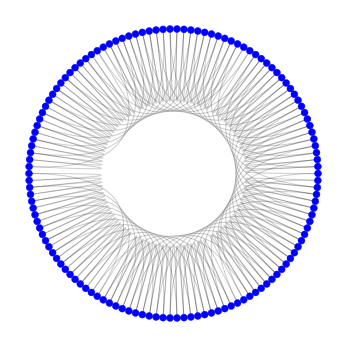

In [16]:
from datetime import datetime, timedelta

year, month, day1, day2 = 2011, 11, 10, 6
date1 = datetime(year, month, day1)
date2 = datetime(year, month, day2)
date1 > date2

from nxviz import CircosPlot

c = CircosPlot(nx.hexagonal_lattice_graph(10, 5)) # several inputs possible on 'bipartite'

c.draw()

plt.show()

### subGraph from original

```python
# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True) )

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004,5,16)])
```

### visual

```python
# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.node[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_color='bipartite', node_grouping='bipartite', node_order='dc')

# Draw c to screen
c.draw()

# Display the plot
plt.show()  
```

## Datetime arithmetic

```python
date1 = datetime.datetime(2011, 11, 10, 0, 0)
days = 4
td = timedelta(days)
date1 + td # = (2011, 11, 14, 0, 0)
```

### Dynamics overtime

```python
# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(days=2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    # Increment the curr_day by the time delta
    curr_day += td
   
# Create the plot 
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show()  
```

### Mean Centrality dynamics

```python
# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show()
```

## Find most popular forums over time

```python
# Instantiate a list to hold the list of most popular forums by day: most_popular_forums
most_popular_forums = []
# Instantiate a list to hold the degree centrality scores of the most popular forums: highest_dcs
highest_dcs = []
curr_day = dayone  
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1: 
        print(curr_day) 
    # Instantiate new graph: G_sub
    G_sub = nx.Graph()
    
    # Add in nodes from original graph G
    G_sub.add_nodes_from(G.nodes(data=True))
    
    # Add in edges from the original graph G that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # CODE CONTINUES ON NEXT EXERCISE
    curr_day += td
```

#### Dictionary comprehension
```python
{key: val for key, val in dict.items() if ...}```

```python
most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in forum_dcs.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show()
```

> one per-day basis, it would be fond to see which fourms were the msot popular over time, some further questions might include - was it the same set over teime ? or were some foursm really popular early on and othes popular later on?